In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
dataset_train = pd.read_csv("/content/Google_train_data.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [22]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [24]:
from re import X
X_train = []
Y_train = []
for i in range(60,1258):
  X_train.append(scaled_training_set[i-60:i, 0])
  Y_train.append(scaled_training_set[i, 0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(X_train.shape)
print(Y_train.shape)

(1198, 60)
(1198,)


In [25]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_train.shape

(1198, 60, 1)

In [26]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [27]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout (0.2))

regressor.add(Dense (units=1))

In [28]:
regressor.compile(optimizer = 'adam', loss ='mean_squared_error')
regressor.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
38/38 [==============================] - 27s 154ms/step - loss: 0.0353
Epoch 2/10
38/38 [==============================] - 4s 118ms/step - loss: 0.0060
Epoch 3/10
38/38 [==============================] - 5s 123ms/step - loss: 0.0060
Epoch 4/10
38/38 [==============================] - 6s 152ms/step - loss: 0.0055
Epoch 5/10
38/38 [==============================] - 4s 118ms/step - loss: 0.0054
Epoch 6/10
38/38 [==============================] - 6s 151ms/step - loss: 0.0047
Epoch 7/10
38/38 [==============================] - 5s 116ms/step - loss: 0.0049
Epoch 8/10
38/38 [==============================] - 5s 119ms/step - loss: 0.0047
Epoch 9/10
38/38 [==============================] - 6s 158ms/step - loss: 0.0049
Epoch 10/10
38/38 [==============================] - 5s 124ms/step - loss: 0.0049


In [29]:
dataset_test = pd.read_csv("/content/Google_test_data.csv")

actual_stock_price = dataset_test.iloc[:,1:2].values

In [30]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total [len(dataset_total)- len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []

for i in range(60,80):
  X_test.append(inputs [i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [31]:
predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 3s 3s/step


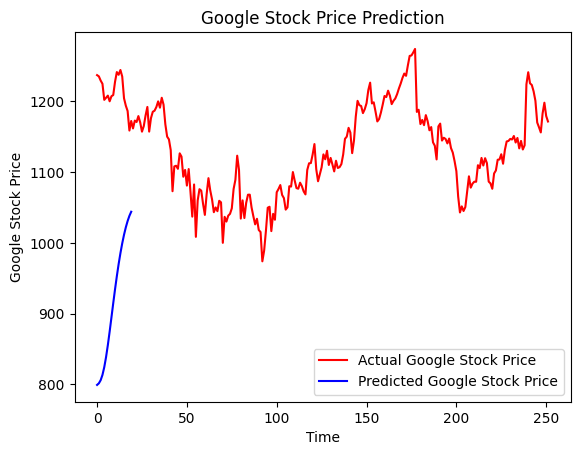

In [32]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Google Stock Price')

plt.plot(predicted_stock_price, color = 'blue', label='Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')

plt.xlabel('Time')

plt.ylabel('Google Stock Price')

plt.legend()